In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

Importing my Spotify listening activity between 04.03.2021 00:00 and 04.03.2022 22:20

In [2]:
data = pd.read_json("2022-03-04-spotify.json")
data

,endTime,artistName,trackName,msPlayed
0,2021-03-04 00:02,Architects,Dying Is Absolutely Safe,299013
1,2021-03-04 00:05,Architects,Death Is Not Defeat,225040
2,2021-03-04 00:10,Architects,Hereafter,255586
3,2021-03-04 00:13,Architects,Mortal After All,219773
4,2021-03-04 00:18,Architects,Holy Hell,253973
...,...,...,...,...
45573,2022-03-04 21:58,Camo & Krooked,Kallisto,39680
45574,2022-03-04 22:07,Knife Party,Ghost Train - Muzz Remix,131300
45575,2022-03-04 22:11,Selecta J-Man,Couple Guinness - VIP,270857
45576,2022-03-04 22:16,Mr FijiWiji,Yours Truly,153791


In [3]:
data["endTime"] = pd.to_datetime(data["endTime"], format='%Y-%m-%d %H:%M')
data["month"] = data["endTime"].dt.to_period("M")
data["week"] = data["endTime"].dt.to_period("W")
data["day"] = data["endTime"].dt.to_period("D")
data["hour"] = data["endTime"].dt.to_period("H")

In [4]:
data.head()

,endTime,artistName,trackName,msPlayed,month,week,day,hour
0,2021-03-04 00:02:00,Architects,Dying Is Absolutely Safe,299013,2021-03,2021-03-01/2021-03-07,2021-03-04,2021-03-04 00:00
1,2021-03-04 00:05:00,Architects,Death Is Not Defeat,225040,2021-03,2021-03-01/2021-03-07,2021-03-04,2021-03-04 00:00
2,2021-03-04 00:10:00,Architects,Hereafter,255586,2021-03,2021-03-01/2021-03-07,2021-03-04,2021-03-04 00:00
3,2021-03-04 00:13:00,Architects,Mortal After All,219773,2021-03,2021-03-01/2021-03-07,2021-03-04,2021-03-04 00:00
4,2021-03-04 00:18:00,Architects,Holy Hell,253973,2021-03,2021-03-01/2021-03-07,2021-03-04,2021-03-04 00:00


In [5]:
artist_month = data.pivot_table(values="msPlayed", columns="month", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
artist_month = artist_month.sort_values(by='All', ascending=False)
artist_month = artist_month[artist_month["All"] != 0]
artist_month = artist_month.drop(index=['All'])
del(artist_month['All'])

/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/3125700863.py:1: FutureWarning: The provided callable <function sum at 0x10b89a7a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  artist_month = data.pivot_table(values="msPlayed", columns="month", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/3125700863.py:1: FutureWarning: The provided callable <function sum at 0x10b89a7a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  artist_month = data.pivot_table(values="msPlayed", columns="month", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/3125700863.py:1: Fu

In [6]:
artist_month[:10]

month,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
artistName,,,,,,,,,,,,,
Tristam,38561092.0,103819909.0,67421186.0,45759039.0,8384051.0,21082347.0,25976707.0,16338292.0,16198019.0,42075194.0,20017786.0,16814081.0,3441726.0
ILLENIUM,6563265.0,1867282.0,6162735.0,4864156.0,19632684.0,13338372.0,13629200.0,12611913.0,65877389.0,37353173.0,39978928.0,17769305.0,1935307.0
Architects,51294221.0,26077763.0,36132546.0,24996171.0,38028417.0,24550736.0,13163429.0,3228658.0,3010222.0,4752912.0,4229447.0,1721787.0,0.0
Dabin,1865661.0,515000.0,4400302.0,5059057.0,1467570.0,843122.0,2335484.0,1217884.0,9005389.0,22682359.0,72184596.0,34794316.0,24209121.0
Seven Lions,9991748.0,6453686.0,3532502.0,5490138.0,12008038.0,9797441.0,16467303.0,21611748.0,12679889.0,14283673.0,27380691.0,14138287.0,4375420.0
Sullivan King,5055743.0,1398048.0,1497427.0,29623495.0,27936175.0,7336617.0,8046804.0,19154626.0,16893357.0,13239254.0,18143590.0,6117522.0,0.0
Au5,20146382.0,6606471.0,7562658.0,15261850.0,12903331.0,7057593.0,7005163.0,16422870.0,8544474.0,10268843.0,15124287.0,8685516.0,1555863.0
Ran-D,5964951.0,802228.0,0.0,11482143.0,3221830.0,8057539.0,37073727.0,5117337.0,7111819.0,8872001.0,18177318.0,6850730.0,0.0
Trivecta,12008094.0,1924202.0,8095245.0,7466412.0,4807980.0,6681158.0,3919072.0,8289925.0,1436565.0,9309883.0,19711508.0,14818081.0,2022080.0


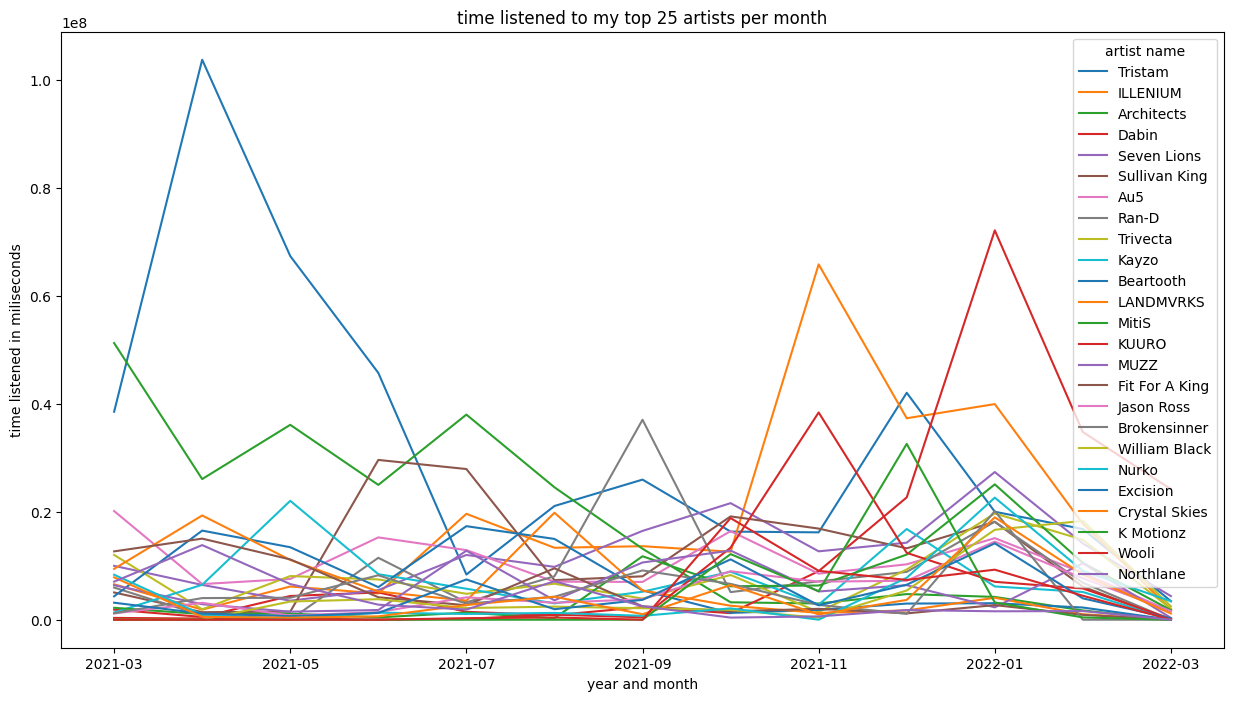

In [7]:
ax = artist_month[:25].T.plot(title = "time listened to my top 25 artists per month",
                         xlabel = "year and month", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")

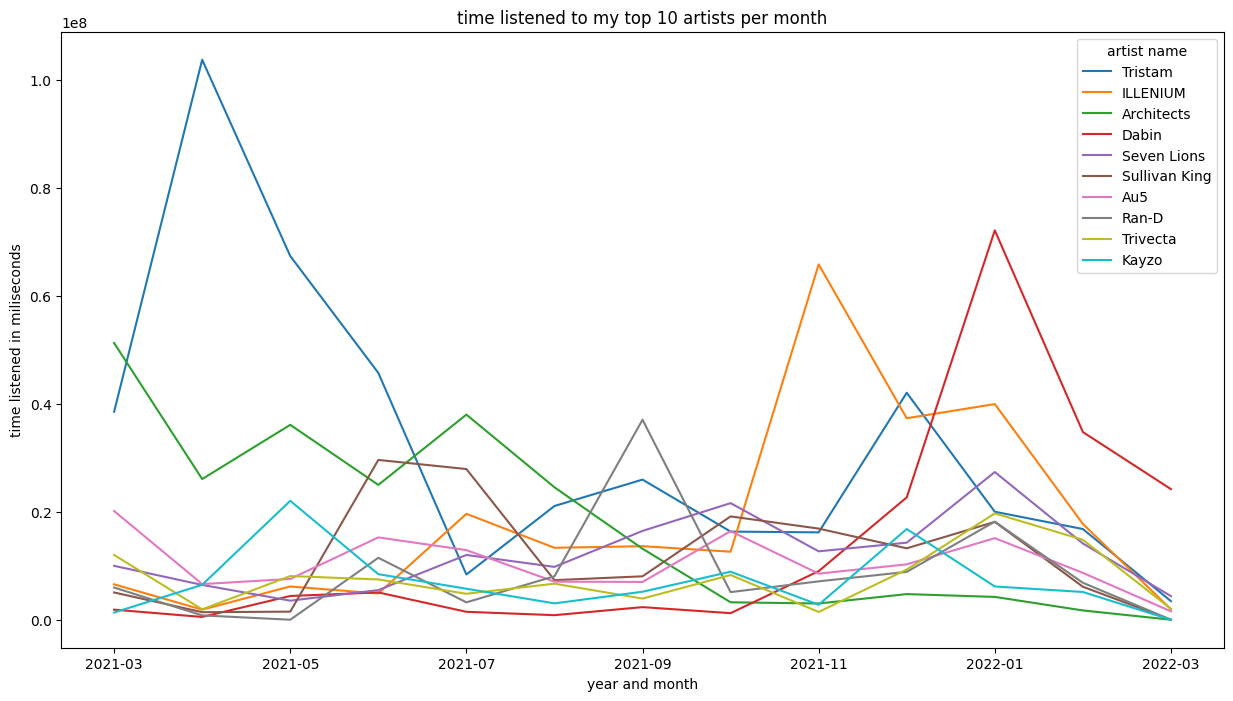

In [8]:
ax = artist_month[:10].T.plot(title = "time listened to my top 10 artists per month",
                         xlabel = "year and month", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")

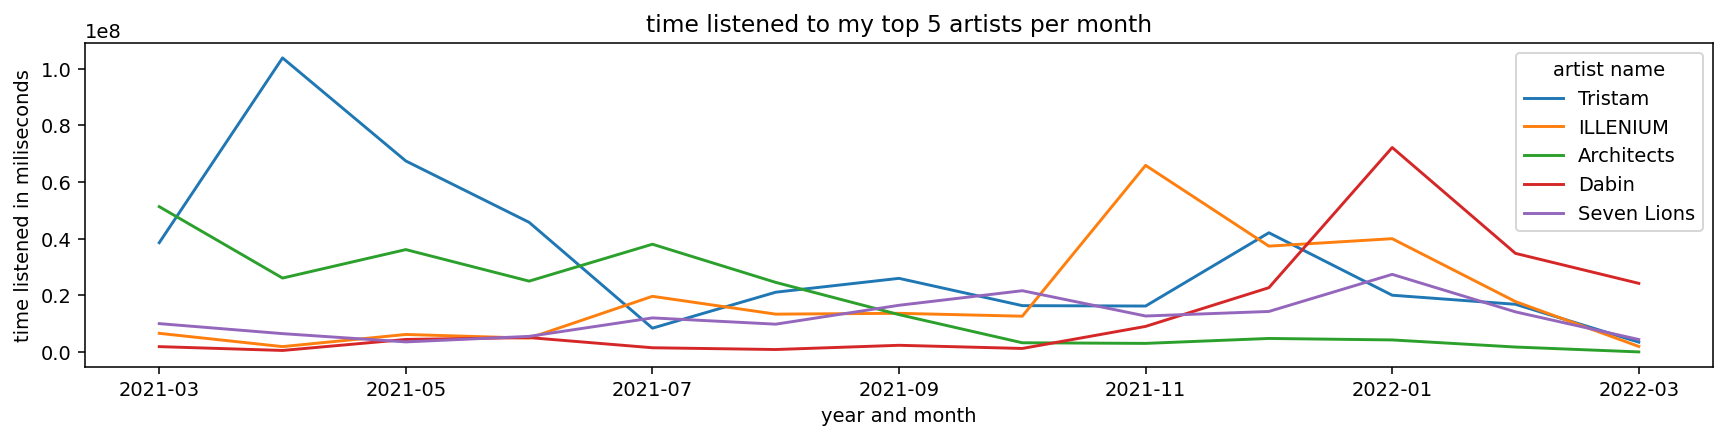

In [9]:
fig = plt.figure(dpi=140)
ax = artist_month[:5].T.plot(
    title="time listened to my top 5 artists per month",
    xlabel="year and month",
    ylabel="time listened in miliseconds",
    figsize=(15, 3),
    kind="line",
    ax=fig.gca(),
)
ax.legend(title="artist name")

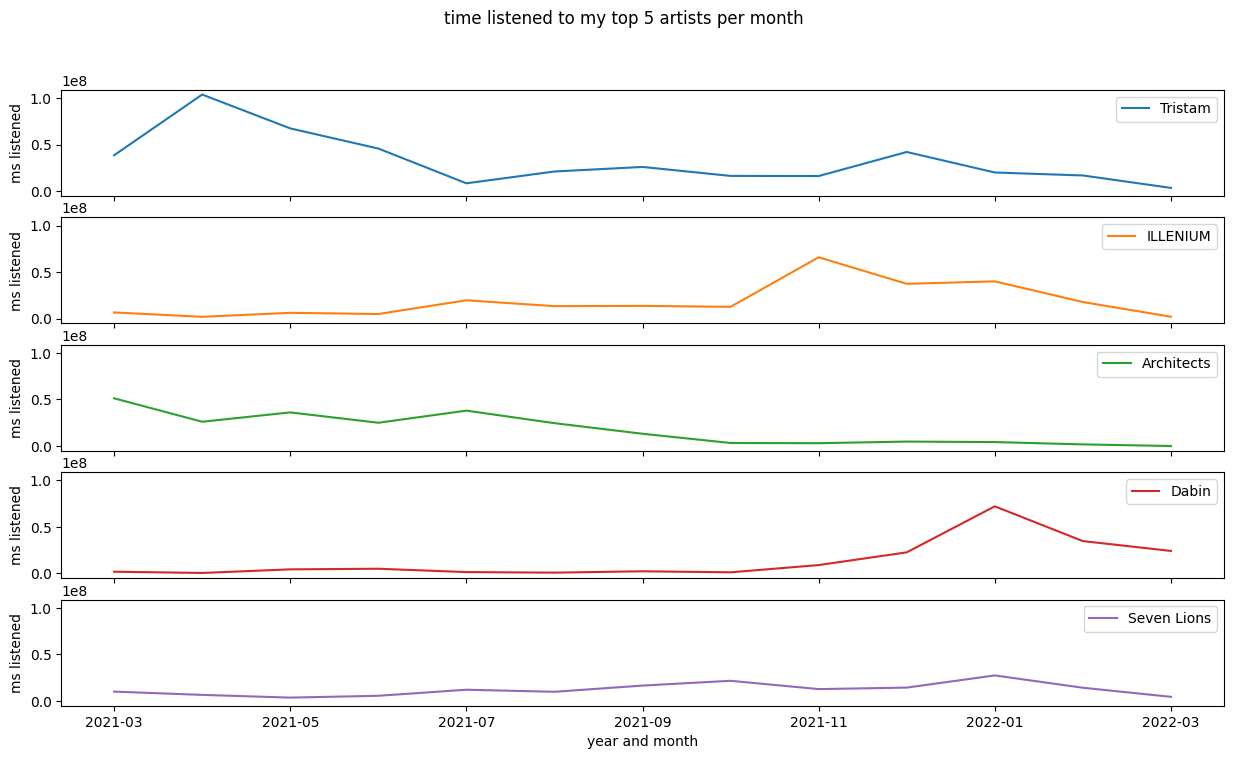

In [10]:
ax = artist_month[:5].T.plot(title = "time listened to my top 5 artists per month",
                         xlabel = "year and month", 
                         ylabel = "ms listened", 
                         figsize = (15,8), 
                         kind = "line",
                         subplots = True,
                         sharey = True)

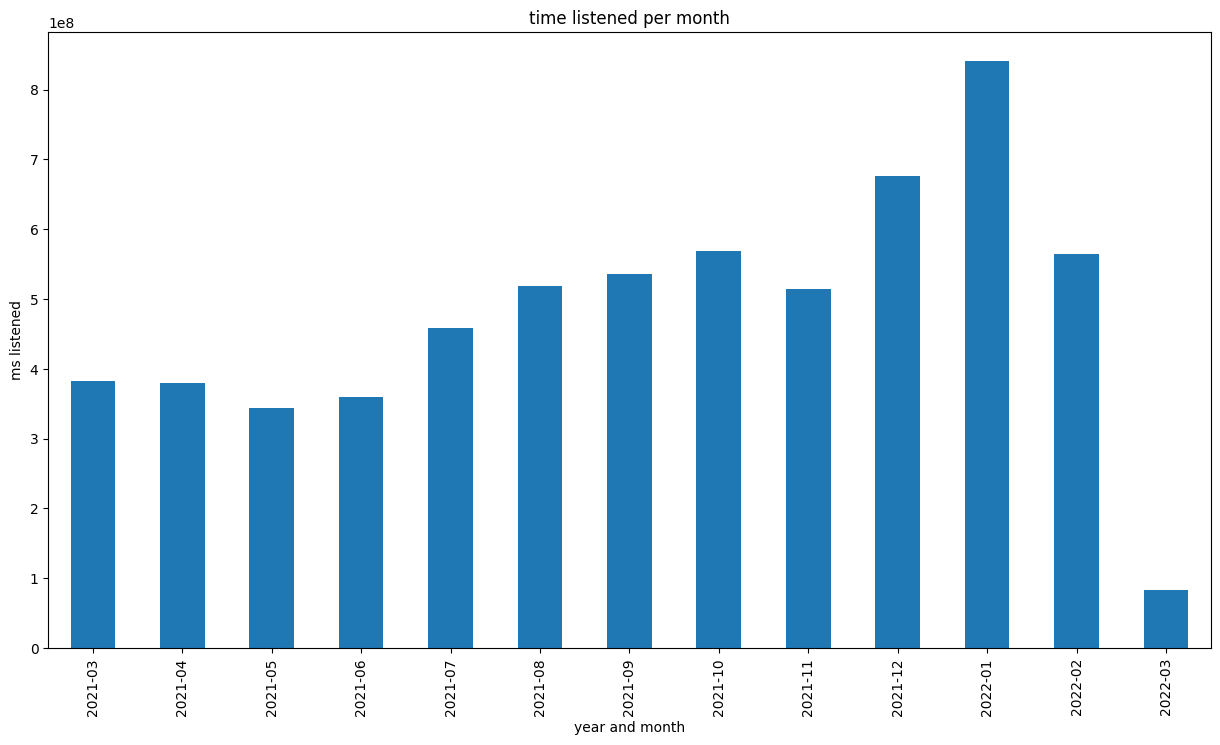

In [11]:
ax = artist_month.sum().plot(title = "time listened per month",
                         xlabel = "year and month", 
                         ylabel = "ms listened", 
                         figsize = (15,8), 
                         kind = "bar",
                         sharey = True)

In [12]:
artist_week = data.pivot_table(values="msPlayed", columns="week", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
artist_week = artist_week.sort_values(by='All', ascending=False)
artist_week = artist_week[artist_week["All"] != 0]
artist_week = artist_week.drop(index=['All'])
del(artist_week['All'])

/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/608462334.py:1: FutureWarning: The provided callable <function sum at 0x10b89a7a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  artist_week = data.pivot_table(values="msPlayed", columns="week", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/608462334.py:1: FutureWarning: The provided callable <function sum at 0x10b89a7a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  artist_week = data.pivot_table(values="msPlayed", columns="week", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/608462334.py:1: FutureWar

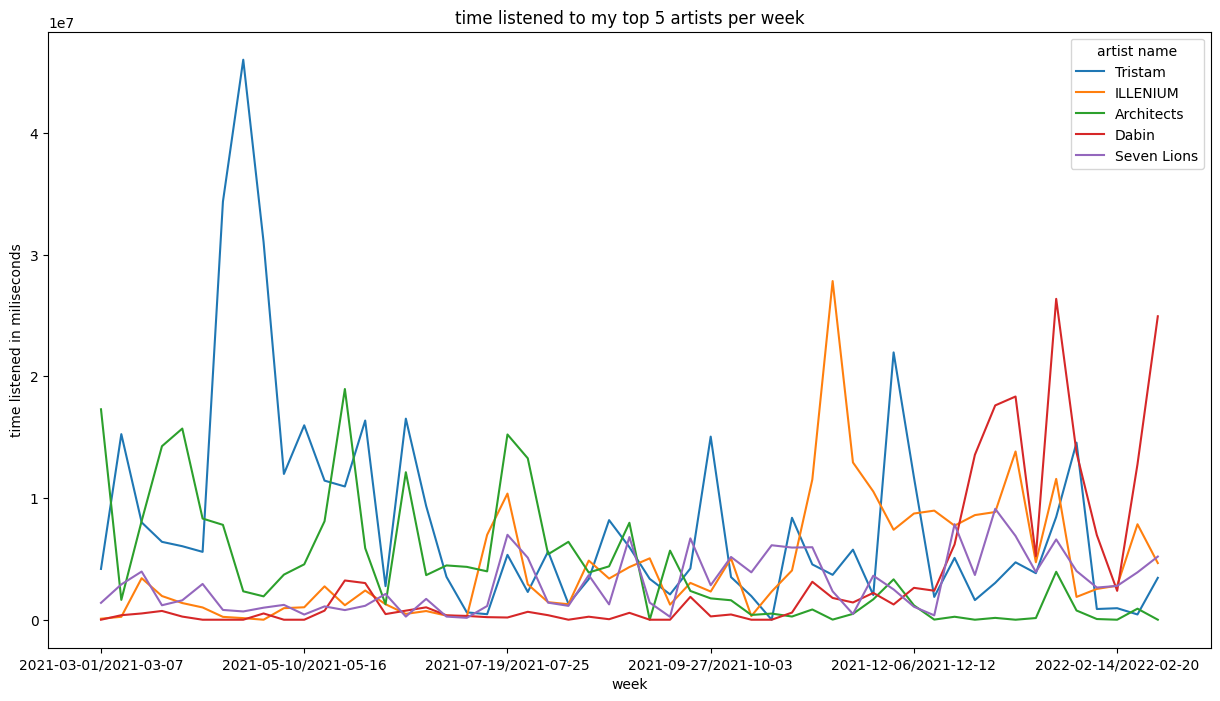

In [13]:
ax = artist_week[:5].T.plot(title = "time listened to my top 5 artists per week",
                         xlabel = "week", 
                         ylabel = "time listened in miliseconds", 
                         figsize = (15,8), 
                         kind = "line")
ax.legend(title = "artist name")

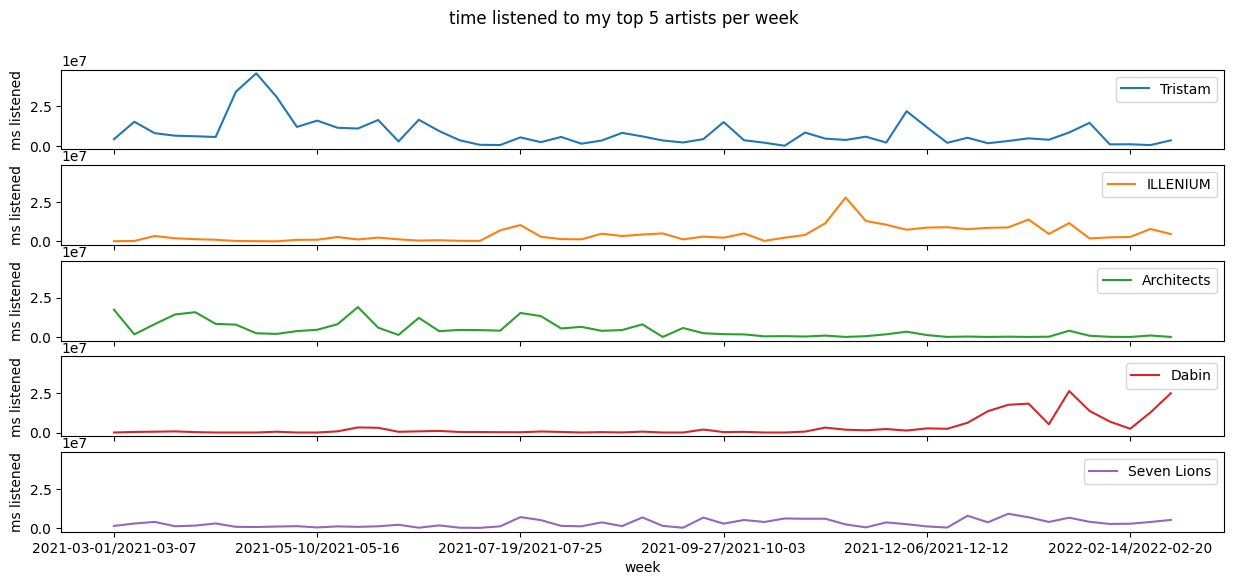

In [14]:
ax = artist_week[:5].T.plot(title = "time listened to my top 5 artists per week",
                         xlabel = "week", 
                         ylabel = "ms listened", 
                         figsize = (15,6), 
                         kind = "line",
                         subplots = True,
                         sharey = True)

In [15]:
artist_day = data.pivot_table(values="msPlayed", columns="day", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
artist_day = artist_day.sort_values(by='All', ascending=False)
artist_day = artist_day[artist_day["All"] != 0]
artist_day = artist_day.drop(index=['All'])
del(artist_day['All'])

/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/1468718785.py:1: FutureWarning: The provided callable <function sum at 0x10b89a7a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  artist_day = data.pivot_table(values="msPlayed", columns="day", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/1468718785.py:1: FutureWarning: The provided callable <function sum at 0x10b89a7a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  artist_day = data.pivot_table(values="msPlayed", columns="day", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/1468718785.py:1: FutureWarn

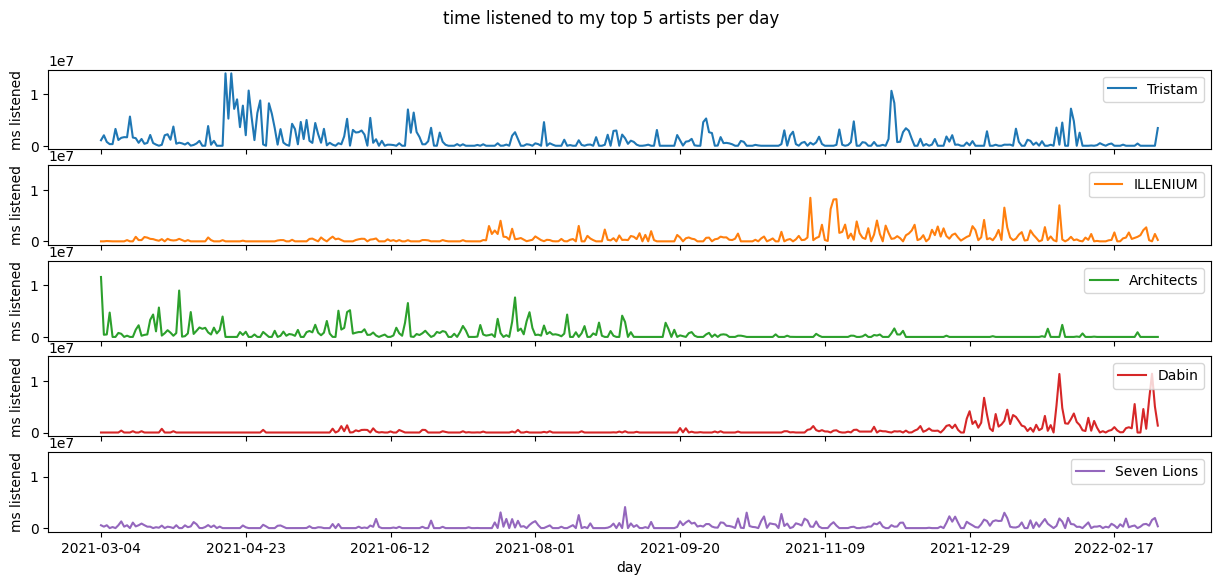

In [16]:
ax = artist_day[:5].T.plot(title = "time listened to my top 5 artists per day",
                      xlabel = "day", 
                      ylabel = "ms listened", 
                      figsize = (15,6), 
                      kind = "line",
                      subplots = True,
                      sharey = True)
for plot in ax:
    plot.legend(loc='upper right')

In [17]:
artist_hour = data.pivot_table(values="msPlayed", columns="hour", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
artist_hour = artist_hour.sort_values(by='All', ascending=False)
artist_hour = artist_hour[artist_hour["All"] != 0]
artist_hour = artist_hour.drop(index=['All'])
del(artist_hour['All'])

/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/1237329661.py:1: FutureWarning: The provided callable <function sum at 0x10b89a7a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  artist_hour = data.pivot_table(values="msPlayed", columns="hour", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/1237329661.py:1: FutureWarning: The provided callable <function sum at 0x10b89a7a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  artist_hour = data.pivot_table(values="msPlayed", columns="hour", index="artistName", margins=True, fill_value=0.0, aggfunc=np.sum)
/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/1237329661.py:1: Future

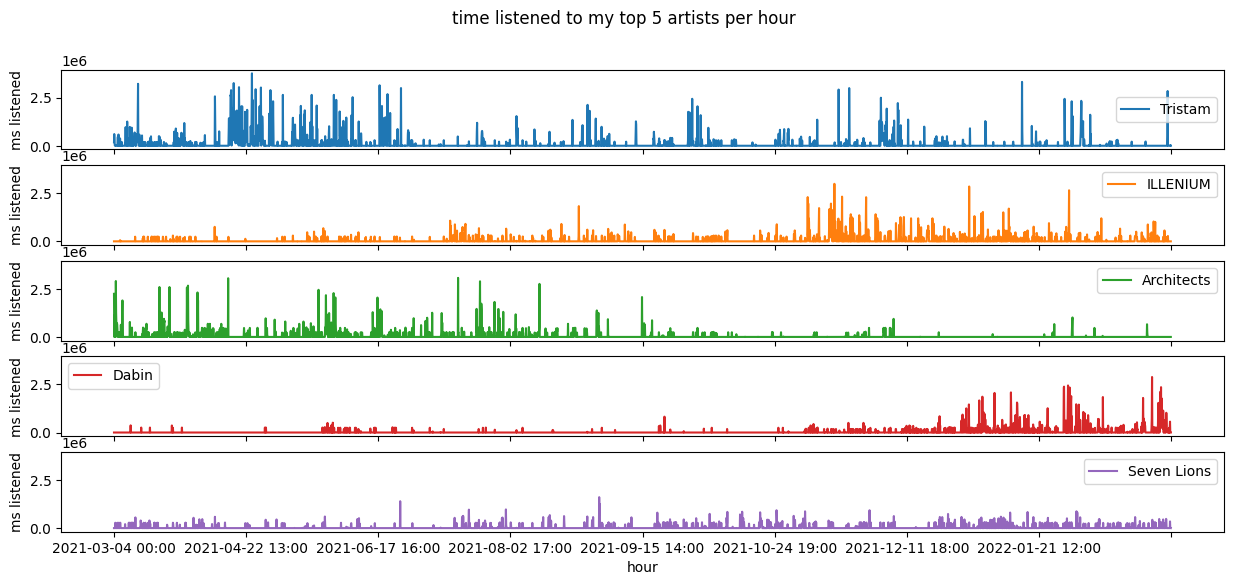

In [18]:
ax = artist_hour[:5].T.plot(title = "time listened to my top 5 artists per hour",
                         xlabel = "hour", 
                         ylabel = "ms listened", 
                         figsize = (15,6), 
                         kind = "line",
                         subplots = True,
                         sharey = True)

In [19]:
artist_sum = data.groupby("artistName")["msPlayed"].agg(np.sum).sort_values(ascending = False)
top10_artist_sum = artist_sum[:10]
top20_artist_sum = artist_sum[:20]

/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/3690317129.py:1: FutureWarning: The provided callable <function sum at 0x10b89a7a0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  artist_sum = data.groupby("artistName")["msPlayed"].agg(np.sum).sort_values(ascending = False)


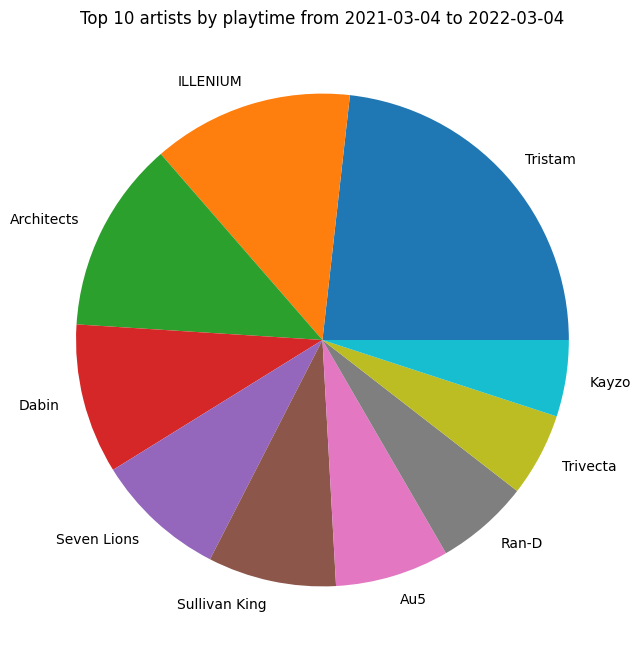

In [20]:
top10_artist_sum.plot.pie(ylabel = "",
                          figsize = (8,8),
                          title = "Top 10 artists by playtime from 2021-03-04 to 2022-03-04")
plt.show()

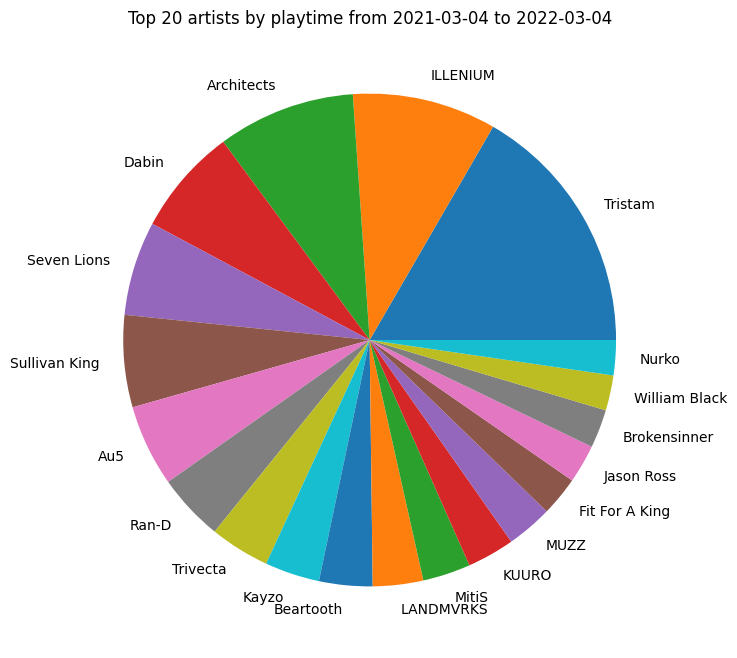

In [21]:
top20_artist_sum.plot.pie(ylabel = "",
                          figsize = (8,8),
                          title = "Top 20 artists by playtime from 2021-03-04 to 2022-03-04")
plt.show()

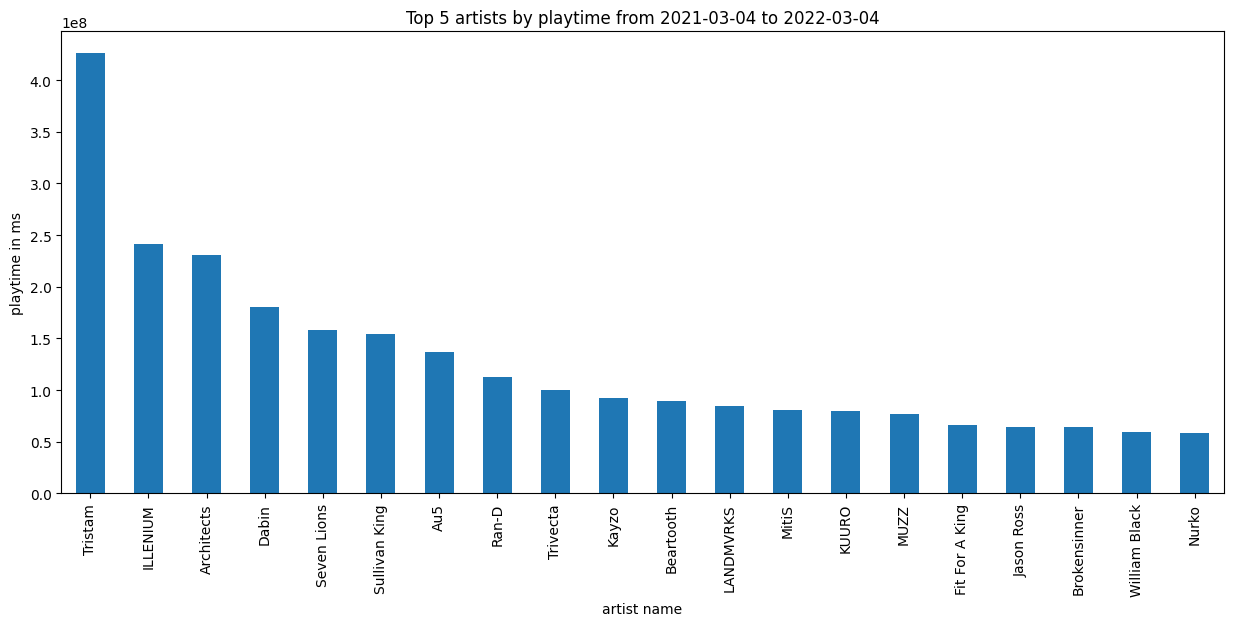

In [22]:
top20_artist_sum.plot.bar(title = "Top 5 artists by playtime from 2021-03-04 to 2022-03-04",
                          figsize = (15, 6),
                          xlabel = "artist name",
                          ylabel = "playtime in ms")
plt.show()

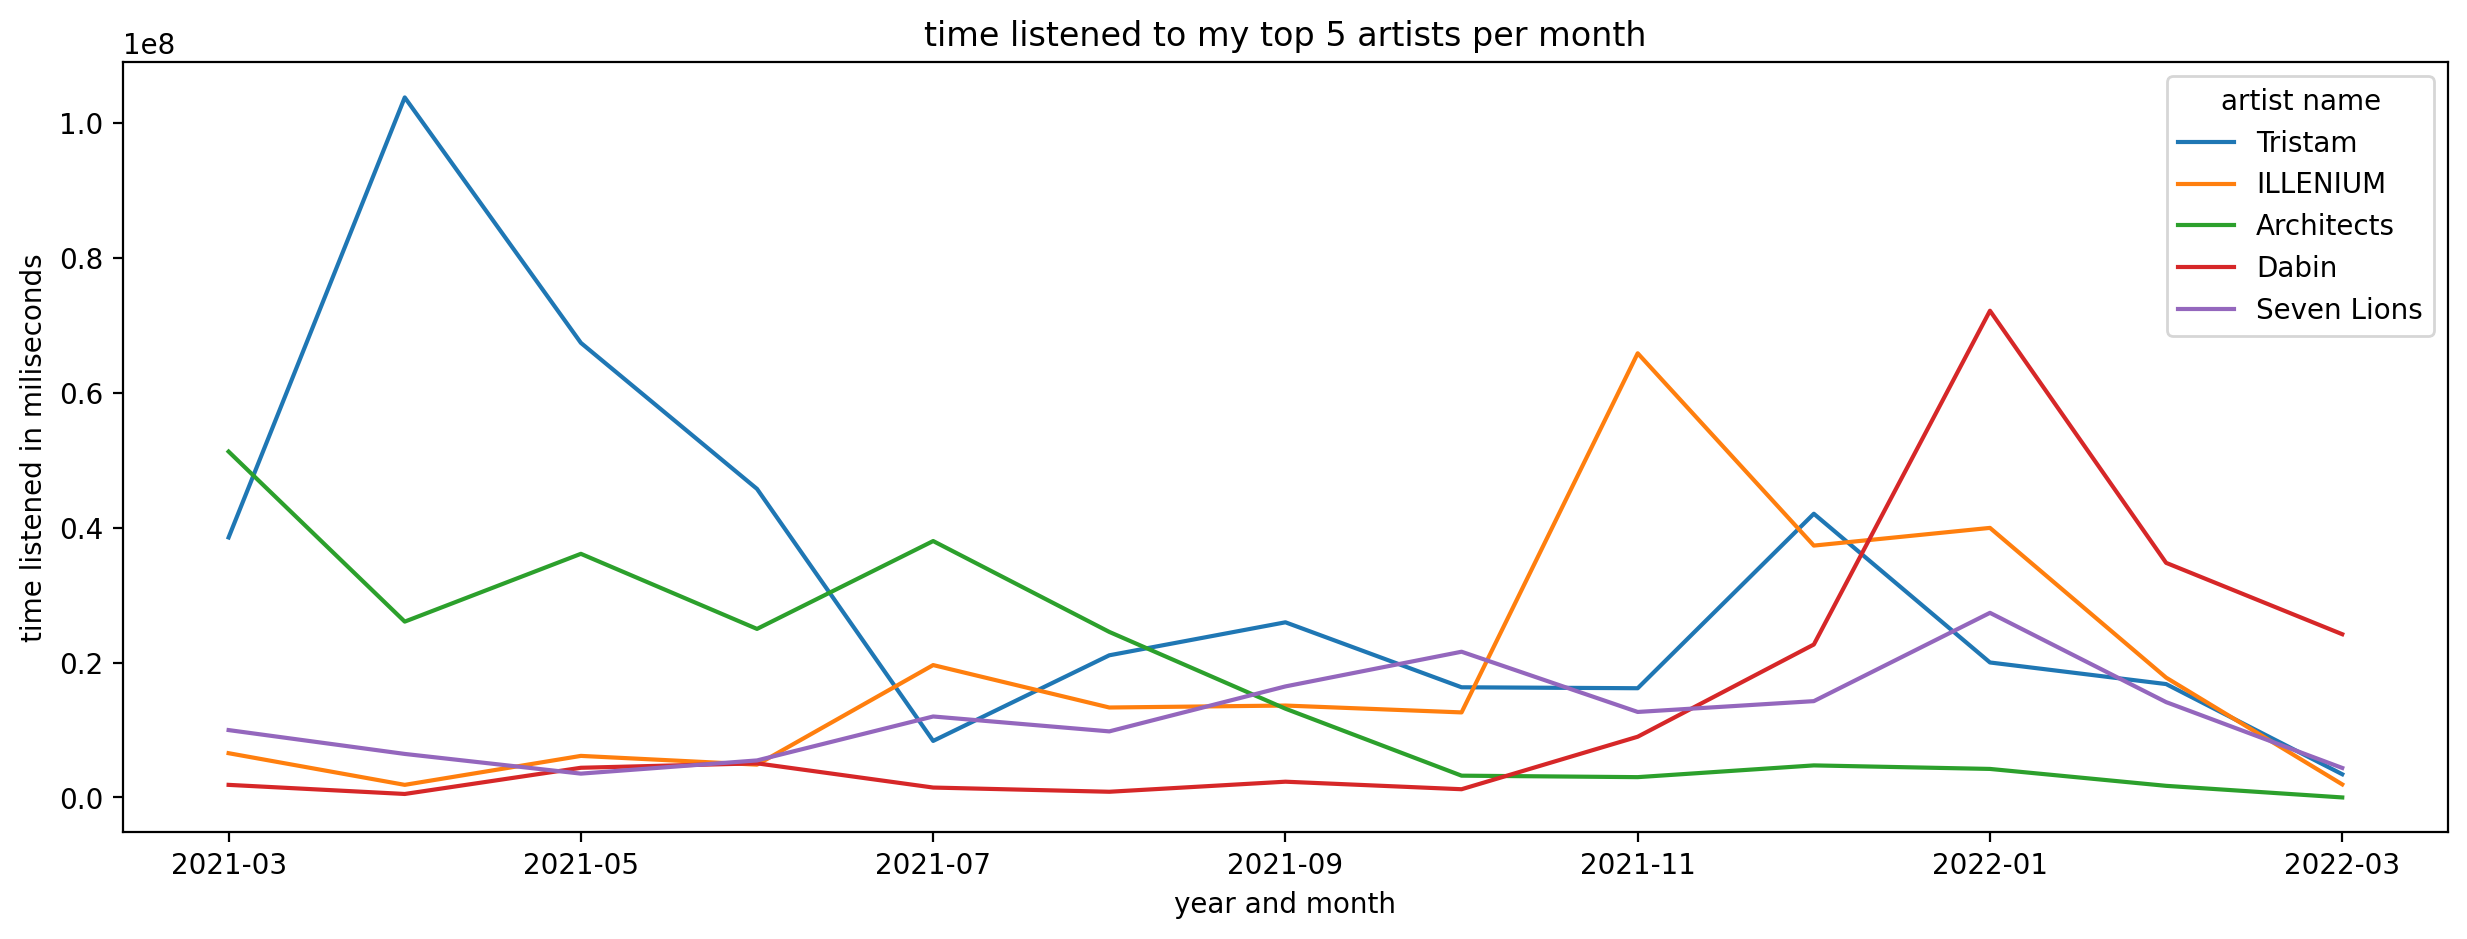

In [27]:
fig = plt.figure(dpi=200)
ax = artist_month[:5].T.plot(
    title="time listened to my top 5 artists per month",
    xlabel="year and month",
    ylabel="time listened in miliseconds",
    figsize=(15, 5),
    kind="line",
    ax=fig.gca(),
)
ax.legend(title="artist name")

Wie interpetiert Namu die Grafik?

- Künstler werden von "Personen" etwa 0.1 - 0.4 (Maaseinheit?) gehört.

Was stört Namu an der Grafik?

- Sehr viele Informationen in der Mitte (Chrüsimüsi). Masseinheiten verwirrend.

Wie lange habe ich Tristam im April 2021 gehört?

- April wurde mit März verwechselt.  

In [37]:
artist_month_hours = artist_month / (1000 * 60 * 24)
artist_month_hours

month,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
artistName,,,,,,,,,,,,,
Tristam,26.778536,72.097159,46.820268,31.777110,5.822258,14.640519,18.039380,11.346036,11.248624,29.218885,13.901240,11.676445,2.390087
ILLENIUM,4.557823,1.296724,4.279677,3.377886,13.633808,9.262758,9.464722,8.758273,45.748187,25.939703,27.763144,12.339795,1.343963
Architects,35.620987,18.109558,25.092046,17.358452,26.408623,17.049122,9.141270,2.242124,2.090432,3.300633,2.937116,1.195685,0.000000
Dabin,1.295598,0.357639,3.055765,3.513234,1.019146,0.585501,1.621864,0.845753,6.253742,15.751638,50.128192,24.162719,16.811890
Seven Lions,6.938714,4.481726,2.453126,3.812596,8.338915,6.803778,11.435627,15.008158,8.805478,9.919217,19.014369,9.818255,3.038486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winyo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Wrechiski,0.000000,0.000000,0.000000,0.000000,0.000168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chilled Velvet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000162,0.000000,0.000000,0.000000


/var/folders/l3/rl43cxg95q9dgp35dpn4hlgw0000gn/T/ipykernel_59643/1052730035.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = artist_month_hours[:5].T.plot(xlabel="", ylabel="", subplots=True, sharey=True, kind="line", ax=fig.gca())


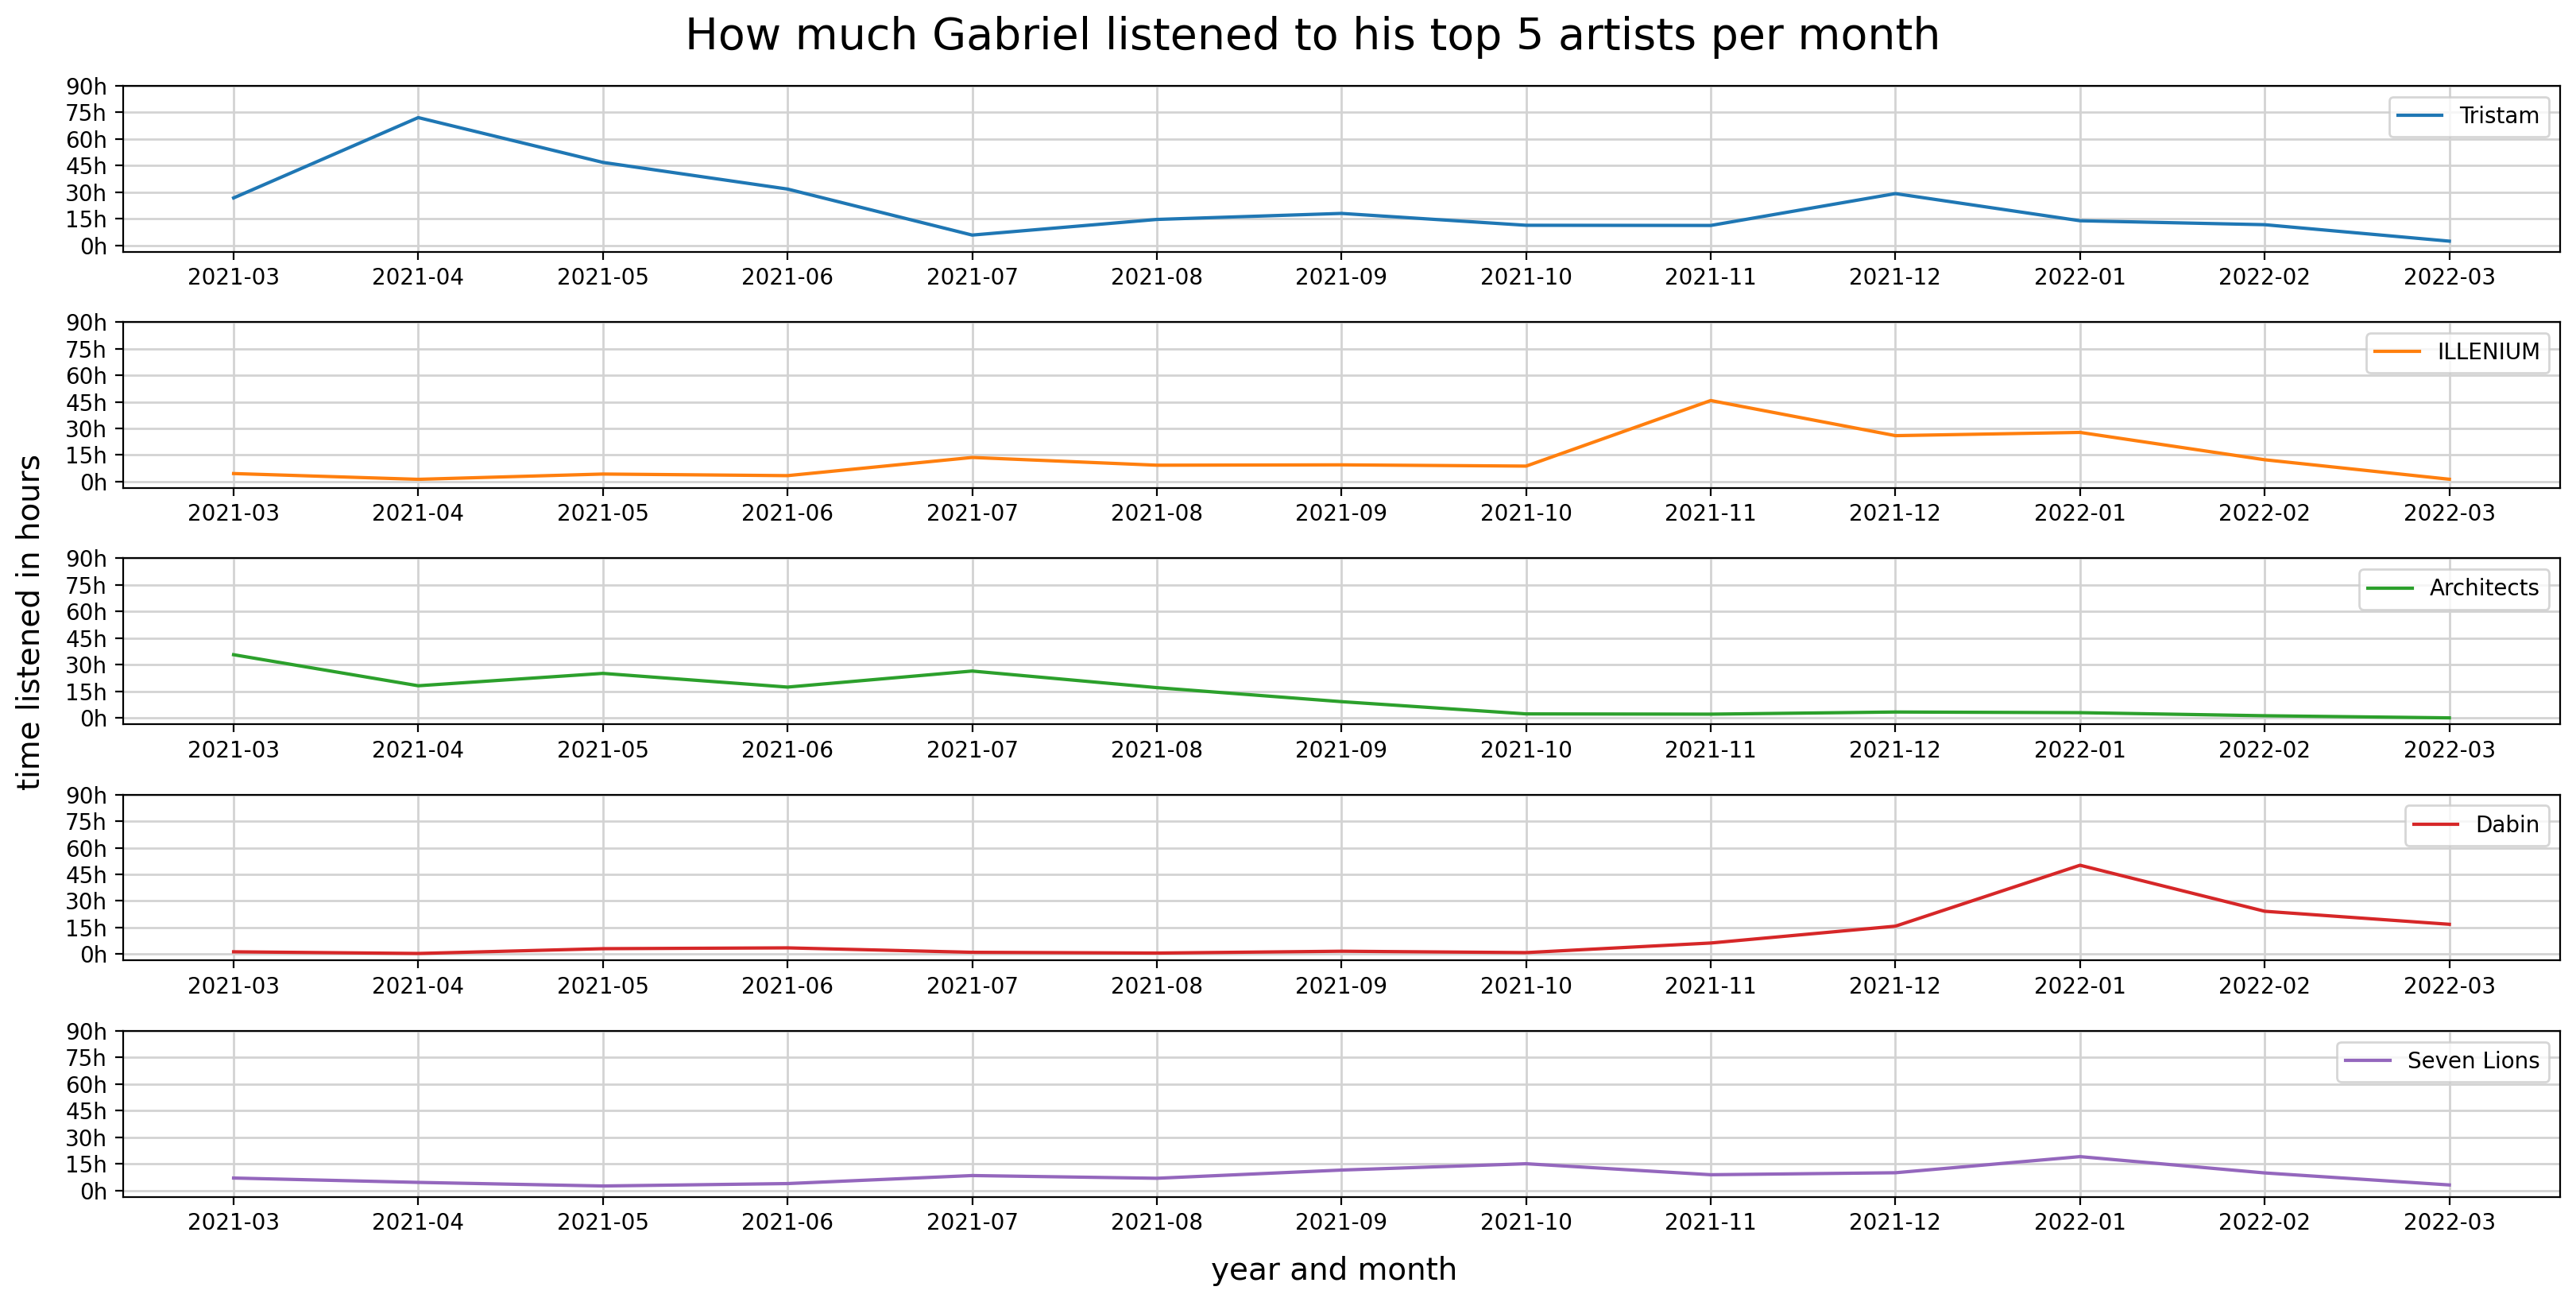

In [145]:
fig = plt.figure(figsize=(16, 8), dpi=200)
axes = artist_month_hours[:5].T.plot(xlabel="", ylabel="", subplots=True, sharey=True, kind="line", ax=fig.gca())

fig.suptitle(
    "How much Gabriel listened to his top 5 artists per month",
    fontsize=20,
    verticalalignment="center", y=.96
)
fig.text(-0.01, 0.5, "time listened in hours", va="center", rotation="vertical", fontsize=14)
fig.text(0.46, -0.01, "year and month", va="center", rotation="horizontal", fontsize=14)

# define ticks
months = artist_month_hours.columns
for ax in axes:
    ax.set_xticks(range(len(months)))
    ax.set_xticklabels(months.format(), rotation=0)
    ax.set_yticks(np.linspace(0, 90, 7))
    ax.set_yticklabels([f"{int(x)}h" for x in np.linspace(0, 90, 7)])
    ax.grid(axis="both", linestyle="-", linewidth=1, color="lightgrey")

plt.tight_layout()
plt.show()